# Craigslist Capstone Project - Exploratory Data Analysis

#### The goal of this capstone is to predict market rent prices in the San Francisco Bay Area. The metros of interest are San Francisco, Peninsula, East Bay. 

Prior to this notebook, the data was parsed from html, cleaned and transformed. 

#### This notebook covers the scope of 

1. Look at mean and median price distributions/handle missing values
2. Explore The Data
3. Correlation between variables
4. PCA between features

## Importing the libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings # For handling error messages. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [18]:
# # Neighborhoods in SF
# SFC_NEIGHBORHOODS = ['alamo square / nopa', 'bayview', 'bernal heights', 'castro / upper market', 'cole valley / ashbury hts', 'downtown / civic / van ness',
#  'excelsior / outer mission', 'financial district', 'glen park', 'haight ashbury', 'hayes valley', 'ingleside / SFSU / CCSF', 'inner richmond',
#  'inner sunset / UCSF', 'laurel hts / presidio', 'lower haight', 'lower nob hill', 'lower pac hts', 'marina / cow hollow', 'mission district',
#  'nob hill', 'noe valley', 'north beach / telegraph hill', 'pacific heights', 'portola district', 'potrero hill', 'richmond / seacliff', 'russian hill', 
# 'SOMA / south beach', 'sunset / parkside', 'tenderloin','treasure island', 'twin peaks / diamond hts', 'USF / panhandle', 'visitacion valley', 
# 'west portal / forest hill', 'western addition']

# # Neighborhoods in Peninsula
# PEN_NEIGHBORHOODS = ['atherton','belmont','brisbane','burlingame','coastside/pescadero','daly city','east palo alto','foster city','half moon bay','los altos','menlo park','millbrae',
#                      'mountain view','pacifica','palo alto','portola valley','redwood city','redwood shores','san bruno','san carlos','san mateo','south san francisco','woodside']

# # Neighborhoods in the East Bay
# EBY_NEIGHBORHOODS = ['alameda','albany / el cerrito','berkeley','berkeley north / hills','brentwood / oakley','concord / pleasant hill / martinez','danville / san ramon',
#                      'dublin / pleasanton / livermore','emeryville','fairfield / vacaville','fremont / union city / newark','hayward / castro valley','hercules, pinole, san pablo, el sob',
#                      'lafayette / orinda / moraga','oakland downtown','oakland east','oakland hills / mills','oakland lake merritt / grand','oakland north / temescal',
#                      'oakland piedmont / montclair','oakland rockridge / claremont','oakland west','pittsburg / antioch','richmond / point / annex','san leandro','vallejo / benicia','walnut creek']
# List of cities
SFC_CITIES = ['San Francisco']
PEN_CITIES = ['Palo Alto','San Mateo','Mountain View','Redwood City','Menlo Park','Daly City','San Bruno','South San Francisco','Foster City','Burlingame']
EBY_CITIES = ['Oakland','Berkeley','Fremont','Walnut Creek','Concord','Hayward','Alameda','Pleasanton','San Leandro','Vallejo','San Ramon','Emeryville',
        'Dublin','Richmond','Fairfield','Livermore','Antioch','Pittsburg','Union City','El Cerrito']

ALL_CITIES = SFC_CITIES + PEN_CITIES + EBY_CITIES

# Dictionaries for neighborhood and city relationship
METRO_TO_NEIGHBORHOODS = {'sfc': SFC_NEIGHBORHOODS, 'pen': PEN_NEIGHBORHOODS, 'eby': EBY_NEIGHBORHOODS}
METRO_TO_CITIES = {'sfc': SFC_CITIES, 'pen': PEN_CITIES, 'eby': EBY_CITIES}

NEIGHBORHOOD_TO_METRO = {neighborhood: metro for metro, neighborhoods in METRO_TO_NEIGHBORHOODS.items() for neighborhood in neighborhoods}
CITY_TO_METRO = {city: metro for metro,cities in METRO_TO_CITIES.items() for city in cities}

# # Create a dictionary mapping listing_info values to the categorical column name
# LISTING_INFO_TO_COLUMN = {'cats are OK - purrr':'animals_cats','dogs are OK - wooof':'animals_dogs','furnished':'furnished',
#                     'no smoking':'smoking','wheelchair accessible':'wheelchair accessible','air conditioning':'has_AC',
#                      'EV charging':'hasEVCharging','laundry in bldg':'laundry_in_bldg','w/d in unit':'laundry_in_unit',
#                      'w/d hookups':'laundry_has_hookup','laundry on site':'laundry_onsite','no laundry on site':'laundry_not_onsite',
#                      'carport':'parking_carport','attached garage':'parking_attached_garage','detached garage':'parking_detached_garage',
#                      'off-street parking':'parking_offstreet','street parking':'parking_street','valet parking':'parking_valet','no parking':'parking_none',
#                      'rent period: daily':'rent_period_daily','rent period: weekly':'rent_period_weekly','rent period: monthly':'rent_period_monthly',
#                      'condo':'housing_condo','apartment':'housing_apt','cottage/cabin':'housing_cottage','duplex':'housing_duplex',
#                      'flat':'housing_flat','house':'housing_house','in-law':'housing_inlaw','loft':'housing_inlaw','townhouse':'housing_townhouse'}

# # Create a dictionary mapping listing_body features to the categorical column name
# LISTING_BODY_TO_COLUMN = {'rent control':'is_rent_controlled','no pets':'pets_allowed','remodelled':'is_remodelled',
#                          '(amenities)|(pool)|(gym)|(spa)':'has_amenities'}

## Load the data

In [19]:
# The cleaned html listing data is the interim directory
dir_folder = '/Users/pandabear/springboard/CapstoneTwoProject/data/interim/'
df = pd.read_csv(dir_folder + 'listing_df_cleaned_ws.csv',index_col='listing_id')

In [20]:
df.head()

,listing_title,listing_nh,listing_city,listing_date,listing_price,listing_bedrooms,listing_bathrooms,listing_sqft,listing_address,listing_info,...,housing_house,housing_inlaw,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score
listing_id,,,,,,,,,,,,,,,,,,,,,
7495842903,"$1695/1br - Spacious, Furnished Studio on Quie...",palo alto,Palo Alto,2022-06-13 01:02:29-07:00,1695,1,1,400.0,Charleston near Alma,apartment w/d in unit street parking rent ...,...,0,0,0,0,1,0,1,85.0,46.0,100.0
7495966009,"LIVE/WORK/ART LOFT NATURAL SUNLIGHT, INDUSTRIA...",mission district,San Francisco,2022-06-13 08:59:09-07:00,4999,1,1,927.0,555 Florida St. near Mariposa,open house dates thursday 2022-07-28 fri...,...,0,0,0,0,1,0,1,97.0,83.0,100.0
7496082921,"$2,125 Studio! Jingle Town! Welcome To 3030 Ch...",oakland east,Oakland,2022-06-13 12:22:44-07:00,2125,0,1,505.0,3030 Chapman Street near derby,cats are OK - purrr dogs are OK - wooof apa...,...,0,0,0,0,0,0,1,89.0,72.0,91.0
7496092147,Nicely Renovated 2bd/1ba W/New Carpet in Bedro...,oakland east,Oakland,2022-06-13 12:40:39-07:00,2350,2,1,NaN,3050 Fruitvale Ave.,application fee details: Credit Report Check ...,...,0,0,0,0,1,0,1,83.0,57.0,51.0
7496134063,ID#573: Pac Hgts 2BR/1BA Flat w/Pkg & Shared Yd,pacific heights,San Francisco,2022-06-13 14:03:39-07:00,4500,2,1,NaN,Fillmore Street near Jackson Street,apartment laundry in bldg no smoking attac...,...,0,0,0,0,0,0,1,94.0,82.0,57.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10319 entries, 7495842903 to 7528876520
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   listing_title            10319 non-null  object 
 1   listing_nh               10319 non-null  object 
 2   listing_city             10319 non-null  object 
 3   listing_date             10319 non-null  object 
 4   listing_price            10319 non-null  int64  
 5   listing_bedrooms         10319 non-null  object 
 6   listing_bathrooms        10319 non-null  object 
 7   listing_sqft             6914 non-null   float64
 8   listing_address          9997 non-null   object 
 9   listing_info             10319 non-null  object 
 10  listing_body             10319 non-null  object 
 11  listing_url              10319 non-null  object 
 12  listing_first_image      10319 non-null  object 
 13  listing_info_split       10319 non-null  object 
 14  animals_

## 1. Handle missing values

In [22]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
listing_sqft,3405,32.997383
transit_score,1838,17.811803
bike_score,1297,12.569047
listing_address,322,3.120457
walk_score,317,3.072003
housing_cottage,0,0.000000
parking_offstreet,0,0.000000
parking_street,0,0.000000
parking_valet,0,0.000000
parking_none,0,0.000000


### Impute any missing square footage values 
Let's use the median value for the listing's number of bedroom/bathroom

In [23]:
# Group by bedrooms and bathrooms to find median square footage
missing_sqft = df.groupby(by=['listing_bedrooms','listing_bathrooms']).median()['listing_sqft'].reset_index()
missing_sqft.rename(columns = {'listing_sqft':'listing_sqft_median'}, inplace = True)
missing_sqft

,listing_bedrooms,listing_bathrooms,listing_sqft_median
0,0,1,474.0
1,0,1.5,1311.0
2,0,2,2159.0
3,0,3,6300.0
4,0,shared,480.0
5,1,1,676.0
6,1,1.5,976.0
7,1,2,1034.0
8,1,2.5,1988.5
9,1,shared,313.5


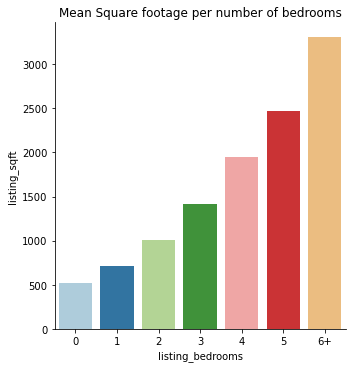

In [24]:
# Find the mean listing_sqft for number of bedrooms
mean_sqft_bedroom = df.groupby('listing_bedrooms').mean()['listing_sqft'].reset_index()
mean_sqft_bedroom
sns.catplot(data=mean_sqft_bedroom, x="listing_bedrooms", y="listing_sqft", kind='bar', dodge=False, order=['0','1','2','3','4','5','6+'], palette=sns.color_palette('Paired')).set(title="Mean Square footage per number of bedrooms")

In [25]:
# Fillna for the one missing value: 2 bedrooms, 3.5 bathrooms with the median square footage for a 2 bedroom
missing_sqft = missing_sqft.merge(mean_sqft_bedroom, on=['listing_bedrooms'], how='left')
missing_sqft['listing_sqft_median'].fillna(missing_sqft['listing_sqft'],inplace=True)
median_sqft = missing_sqft.drop(['listing_sqft'], axis=1)
median_sqft

,listing_bedrooms,listing_bathrooms,listing_sqft_median
0,0,1,474.0000
1,0,1.5,1311.0000
2,0,2,2159.0000
3,0,3,6300.0000
4,0,shared,480.0000
5,1,1,676.0000
6,1,1.5,976.0000
7,1,2,1034.0000
8,1,2.5,1988.5000
9,1,shared,313.5000


In [26]:
# Left join on bedrooms and bathrooms and use the median column if listing_sqft is null
combined_df = df.merge(median_sqft, on=['listing_bedrooms','listing_bathrooms'], how='left')
combined_df.head()

,listing_title,listing_nh,listing_city,listing_date,listing_price,listing_bedrooms,listing_bathrooms,listing_sqft,listing_address,listing_info,...,housing_inlaw,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score,listing_sqft_median
0,"$1695/1br - Spacious, Furnished Studio on Quie...",palo alto,Palo Alto,2022-06-13 01:02:29-07:00,1695,1,1,400.0,Charleston near Alma,apartment w/d in unit street parking rent ...,...,0,0,0,1,0,1,85.0,46.0,100.0,676.0
1,"LIVE/WORK/ART LOFT NATURAL SUNLIGHT, INDUSTRIA...",mission district,San Francisco,2022-06-13 08:59:09-07:00,4999,1,1,927.0,555 Florida St. near Mariposa,open house dates thursday 2022-07-28 fri...,...,0,0,0,1,0,1,97.0,83.0,100.0,676.0
2,"$2,125 Studio! Jingle Town! Welcome To 3030 Ch...",oakland east,Oakland,2022-06-13 12:22:44-07:00,2125,0,1,505.0,3030 Chapman Street near derby,cats are OK - purrr dogs are OK - wooof apa...,...,0,0,0,0,0,1,89.0,72.0,91.0,474.0
3,Nicely Renovated 2bd/1ba W/New Carpet in Bedro...,oakland east,Oakland,2022-06-13 12:40:39-07:00,2350,2,1,NaN,3050 Fruitvale Ave.,application fee details: Credit Report Check ...,...,0,0,0,1,0,1,83.0,57.0,51.0,875.0
4,ID#573: Pac Hgts 2BR/1BA Flat w/Pkg & Shared Yd,pacific heights,San Francisco,2022-06-13 14:03:39-07:00,4500,2,1,NaN,Fillmore Street near Jackson Street,apartment laundry in bldg no smoking attac...,...,0,0,0,0,0,1,94.0,82.0,57.0,875.0


In [27]:
combined_df['listing_sqft'].fillna(combined_df['listing_sqft_median'], inplace=True)
combined_df.drop(['listing_sqft_median'], axis=1, inplace=True)

### Impute any missing Walk score, Transit Score, Bike Score values
Let's use the median value for the listing's neighborhood. All transit scores range from 0 to 100

In [28]:
# Group by neighborhood to find mean walks_score, transit_score, bike_score
median_scores = combined_df.groupby(by=['listing_nh']).median()[['walk_score','transit_score','bike_score']].reset_index()
median_scores.rename(columns = {'walk_score':'mean_walk_score','transit_score':'mean_transit_score','bike_score':'mean_bike_score'}, inplace = True)
median_scores.fillna(0, inplace=True)
median_scores

,listing_nh,mean_walk_score,mean_transit_score,mean_bike_score
0,SOMA / south beach,96.0,100.0,93.0
1,USF / panhandle,95.0,78.0,84.0
2,alameda,76.0,47.0,78.0
3,alamo square / nopa,97.0,82.0,84.0
4,albany / el cerrito,87.0,46.0,82.0
...,...,...,...,...
77,visitacion valley,75.5,69.0,51.0
78,walnut creek,67.0,43.0,61.0
79,west portal / forest hill,86.0,72.0,65.0
80,western addition,98.0,83.0,81.0


In [29]:
# Left join on neighborhoods
nh_df = combined_df.merge(median_scores, on=['listing_nh'], how='left')

# Use the mean score values if walk_score, transit_score or bike_score is null
nh_df['walk_score'].fillna(nh_df['mean_walk_score'],inplace=True)
nh_df['transit_score'].fillna(nh_df['mean_transit_score'],inplace=True)
nh_df['bike_score'].fillna(nh_df['mean_bike_score'],inplace=True)

The missing addresses are ok to ignore since we will not be using that feature directly. The neighborhood and walk_score, transit_score, bike_scores are better representations of how desirable a property is compared to the exact address. 


In [30]:
nh_df.drop(['listing_address','mean_walk_score','mean_transit_score','mean_bike_score'], axis=1,inplace=True)

In [31]:
nh_df.isnull().sum()
df = nh_df

## 2. Explore The Data

Text(0, 0.5, 'City')

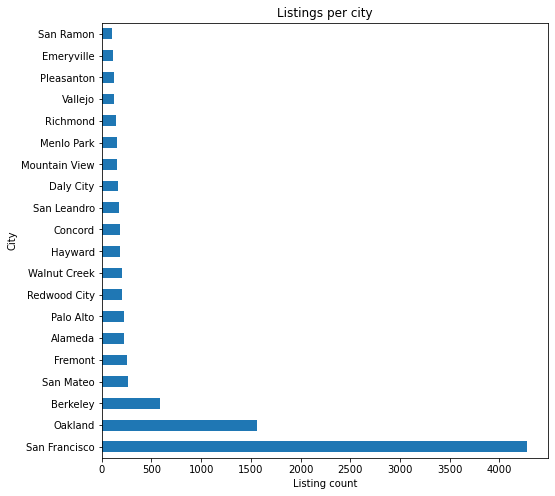

In [32]:
# Plot the distribution of listings per city
df['listing_city'].value_counts().head(20).plot(kind='barh',figsize=(8,8))
plt.title("Listings per city")
plt.xlabel("Listing count")
plt.ylabel("City")

In [33]:
# Count frequency of listings by neighborhood and city
nh_count = df[['listing_nh','listing_city']].value_counts().reset_index()
nh_count.columns = ['neighborhood', 'city', 'count']
nh_metro_df = pd.DataFrame(nh_count)
nh_metro_df['metro'] = nh_metro_df.apply(lambda x: CITY_TO_METRO[x.city], axis=1)
nh_metro_df.head()

,neighborhood,city,count,metro
0,berkeley,Berkeley,511,eby
1,oakland lake merritt / grand,Oakland,469,eby
2,SOMA / south beach,San Francisco,456,sfc
3,mission district,San Francisco,336,sfc
4,nob hill,San Francisco,317,sfc


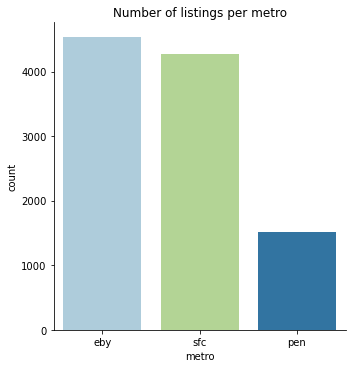

In [34]:
metro_total = pd.DataFrame(nh_metro_df.groupby(['metro'])['count'].sum()).reset_index()
metro_total
sns.catplot(data=metro_total, x="metro", y="count", hue='metro', kind='bar', dodge=False, order=['eby','sfc','pen'], palette=sns.color_palette('Paired')).set(title="Number of listings per metro")


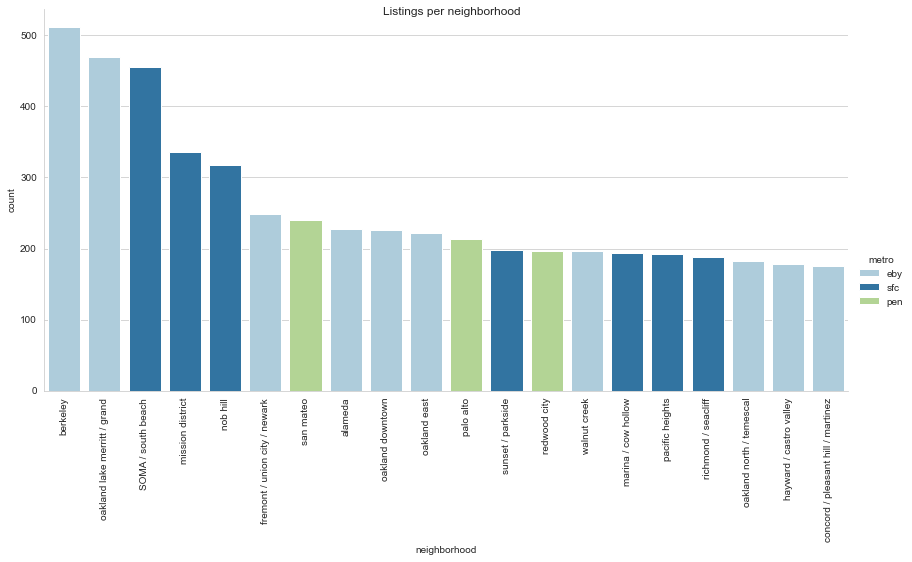

In [35]:
sns.set_style(style="whitegrid")
g = sns.catplot(x='neighborhood', y='count', data = nh_metro_df[:20], hue='metro', kind='bar',height=6, aspect=2, dodge=False, palette=sns.color_palette('Paired'))
g.fig.suptitle("Listings per neighborhood")
g.set_xticklabels(rotation=90)

There seems to be an equal spread of listings across the metros. 


In [36]:
nh_metro_df.shape
#.metro.value_counts()

(149, 4)

In [37]:
sorted_prices_by_city = df.groupby('listing_city').listing_price.mean().sort_values().reset_index()
sorted_city_list = sorted_prices_by_city['listing_city']
sorted_prices_by_city

,listing_city,listing_price
0,Vallejo,2197.570248
1,Antioch,2367.282051
2,Fairfield,2443.324675
3,Concord,2493.100000
4,San Leandro,2505.436047
5,Pittsburg,2573.750000
6,Richmond,2578.728571
7,Hayward,2623.481481
8,Oakland,2718.250800
9,El Cerrito,2849.593407


Text(0.5, 1.0, 'Listing City vs Listing Price (sorted by mean price per city)')

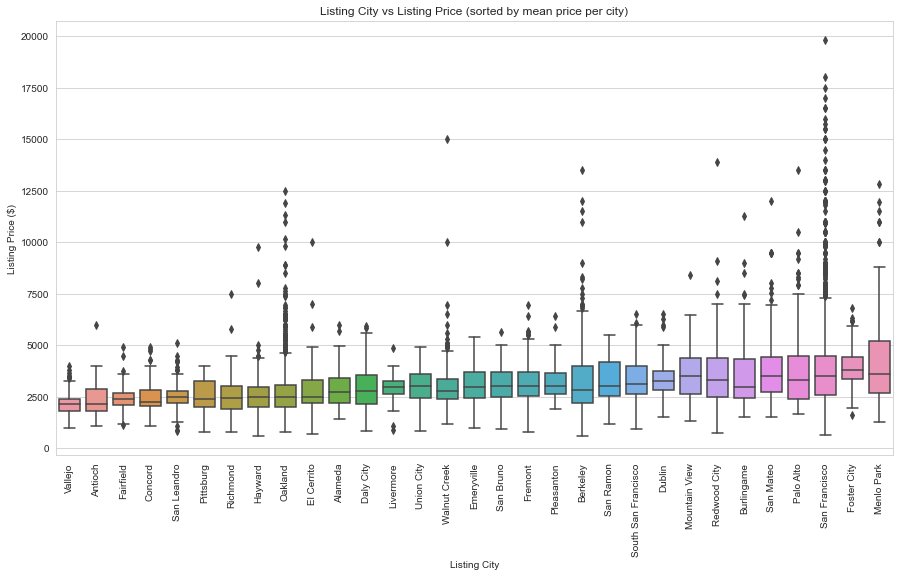

In [38]:
# Boxplot of the distribution of prices for each city
plt.subplots(figsize=(15, 8))
sns.boxplot(x='listing_city', y='listing_price', data=df, order = sorted_city_list)
plt.xticks(rotation='vertical')
plt.ylabel('Listing Price ($)')
plt.xlabel('Listing City')
plt.title('Listing City vs Listing Price (sorted by mean price per city)')

[(500.0, 20000.0)]

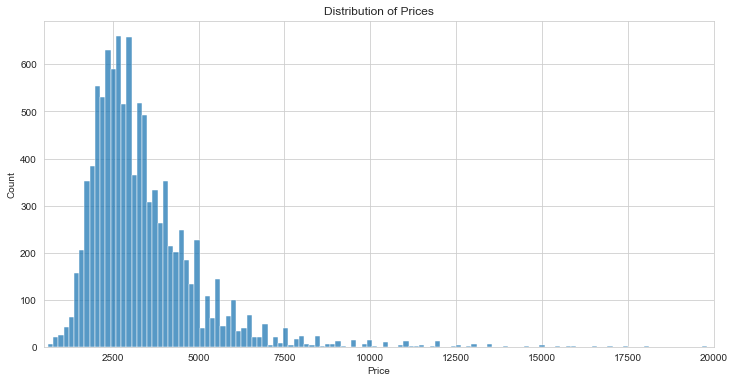

In [39]:
# Look at the distribution of price
plt.figure(figsize=(12, 6))
g = sns.histplot(data=df['listing_price'], palette=sns.color_palette('Paired'))
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel('Count')
g.set(xlim=(500,20000))

In [40]:
df['listing_bedrooms'].unique()

array(['1', '0', '2', '4', '3', '5', '6+'], dtype=object)

In [41]:
df['listing_bathrooms'].unique()

array(['1', '2', '1.5', '3', '2.5', '3.5', 'shared', '4+'], dtype=object)

In [42]:
# Convert the bedroom and bathroom features into numeric ones
df.loc[:,"no_bedrooms"] = pd.to_numeric(df["listing_bedrooms"].str.replace('+', ''))
df.loc[:,"no_bathrooms"] = pd.to_numeric(df["listing_bathrooms"].str.replace('+', '').str.replace('shared', '0.5'))

Text(58.87997868010466, 2200, 'mean: 75')

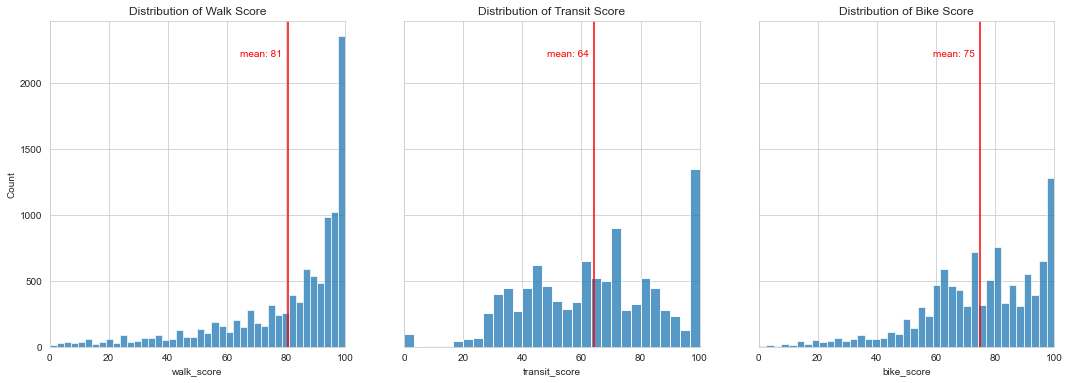

In [43]:
# Look at the distribution of walk, transit and bike scores per neighborhood
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,6))
g1 = sns.histplot(data=df['walk_score'], ax=ax1)
g2 = sns.histplot(data=df['transit_score'], ax=ax2)
g3 = sns.histplot(data=df['bike_score'], ax=ax3)
g1.axvline(df['walk_score'].mean(), color='red')
g2.axvline(df['transit_score'].mean(), color='red')
g3.axvline(df['bike_score'].mean(), color='red')
ax1.set_xlim(0, 100)
ax2.set_xlim(0, 100)
ax3.set_xlim(0, 100)
ax1.set_title("Distribution of Walk Score")
ax2.set_title("Distribution of Transit Score")
ax3.set_title("Distribution of Bike Score")
ax1.text(x = df['walk_score'].mean()-16, y=2200, s = 'mean: {:.0f}'.format(df['walk_score'].mean()), color = 'red')
ax2.text(x = df['transit_score'].mean()-16, y=2200, s = 'mean: {:.0f}'.format(df['transit_score'].mean()), color = 'red')
ax3.text(x = df['bike_score'].mean()-16, y=2200, s = 'mean: {:.0f}'.format(df['bike_score'].mean()), color = 'red')

It looks like there are many places with walk scores close to 100. This makes sense as a lot of the neighborhoods are very urban. 

## 3. Correlation between variables

In [44]:
df.head()

,listing_title,listing_nh,listing_city,listing_date,listing_price,listing_bedrooms,listing_bathrooms,listing_sqft,listing_info,listing_body,...,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score,no_bedrooms,no_bathrooms
0,"$1695/1br - Spacious, Furnished Studio on Quie...",palo alto,Palo Alto,2022-06-13 01:02:29-07:00,1695,1,1,400.0,apartment w/d in unit street parking rent ...,"$1695 / 1br - Spacious, Furnished studio with ...",...,0,0,1,0,1,85.0,46.0,100.0,1,1.0
1,"LIVE/WORK/ART LOFT NATURAL SUNLIGHT, INDUSTRIA...",mission district,San Francisco,2022-06-13 08:59:09-07:00,4999,1,1,927.0,open house dates thursday 2022-07-28 fri...,We are excited to offer this spacious loft apa...,...,0,0,1,0,1,97.0,83.0,100.0,1,1.0
2,"$2,125 Studio! Jingle Town! Welcome To 3030 Ch...",oakland east,Oakland,2022-06-13 12:22:44-07:00,2125,0,1,505.0,cats are OK - purrr dogs are OK - wooof apa...,https://www.youtube.com/watch?v=6sTrKvf5hjI&t=...,...,0,0,0,0,1,89.0,72.0,91.0,0,1.0
3,Nicely Renovated 2bd/1ba W/New Carpet in Bedro...,oakland east,Oakland,2022-06-13 12:40:39-07:00,2350,2,1,875.0,application fee details: Credit Report Check ...,Nicely Renovated 2bd/1ba W/New Carpet in Bedro...,...,0,0,1,0,1,83.0,57.0,51.0,2,1.0
4,ID#573: Pac Hgts 2BR/1BA Flat w/Pkg & Shared Yd,pacific heights,San Francisco,2022-06-13 14:03:39-07:00,4500,2,1,875.0,apartment laundry in bldg no smoking attac...,ID#573: Pacific Heights/Fillmore Bright 2BR/1B...,...,0,0,0,0,1,94.0,82.0,57.0,2,1.0


In [45]:
# Look at the correlation between variables
df.corr()

,listing_price,listing_sqft,animals_cats,animals_dogs,furnished,smoking,wheelchair accessible,has_AC,hasEVCharging,laundry_in_bldg,...,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score,no_bedrooms,no_bathrooms
listing_price,1.000000,0.696495,0.052005,0.116650,0.044641,0.031642,0.052377,0.072237,0.118905,-0.142267,...,0.031682,-0.008101,-0.082417,0.001734,0.118561,0.039925,0.132234,0.061609,0.597230,0.613464
listing_sqft,0.696495,1.000000,-0.069641,-0.013823,0.000339,-0.026281,-0.052025,0.099653,0.021938,-0.189268,...,0.114431,-0.072407,-0.014769,-0.003992,0.066153,-0.212048,-0.140530,-0.123257,0.786445,0.777670
animals_cats,0.052005,-0.069641,1.000000,0.819042,-0.007001,0.195339,0.272248,0.157751,0.232201,0.026628,...,-0.033203,0.067100,-0.437753,-0.001923,0.101817,0.026647,0.035696,0.049389,-0.079898,-0.021360
animals_dogs,0.116650,-0.013823,0.819042,1.000000,0.027956,0.191770,0.309930,0.203552,0.253909,-0.036249,...,-0.013965,0.047171,-0.390211,-0.004533,0.127827,-0.004334,0.024765,0.036007,-0.025043,0.033635
furnished,0.044641,0.000339,-0.007001,0.027956,1.000000,0.068603,0.102241,0.119496,0.092044,-0.004573,...,0.000252,-0.036094,-0.020932,0.019074,-0.019794,0.016807,0.033185,0.044992,-0.019130,0.010499
smoking,0.031642,-0.026281,0.195339,0.191770,0.068603,1.000000,0.170294,0.191104,0.133244,0.090083,...,0.020325,0.038349,0.079752,-0.005711,0.049723,0.037978,0.049216,0.029846,-0.043940,-0.006793
wheelchair accessible,0.052377,-0.052025,0.272248,0.309930,0.102241,0.170294,1.000000,0.335117,0.414197,-0.053758,...,-0.024453,-0.053706,-0.135064,-0.009627,0.122702,0.031312,0.029556,0.095866,-0.080045,0.008183
has_AC,0.072237,0.099653,0.157751,0.203552,0.119496,0.191104,0.335117,1.000000,0.315972,-0.129787,...,0.098920,-0.074271,-0.065556,-0.012063,0.095579,-0.194940,-0.210158,-0.058741,0.057287,0.157371
hasEVCharging,0.118905,0.021938,0.232201,0.253909,0.092044,0.133244,0.414197,0.315972,1.000000,-0.078816,...,0.001360,-0.040836,-0.108292,0.015615,0.099230,0.003509,0.009743,0.051123,-0.023598,0.067051
laundry_in_bldg,-0.142267,-0.189268,0.026628,-0.036249,-0.004573,0.090083,-0.053758,-0.129787,-0.078816,1.000000,...,-0.064842,0.089505,0.068955,-0.009237,-0.019676,0.168964,0.154524,0.068463,-0.196052,-0.192938


Text(0.5, 1.0, 'Heatmap of craigslist features')

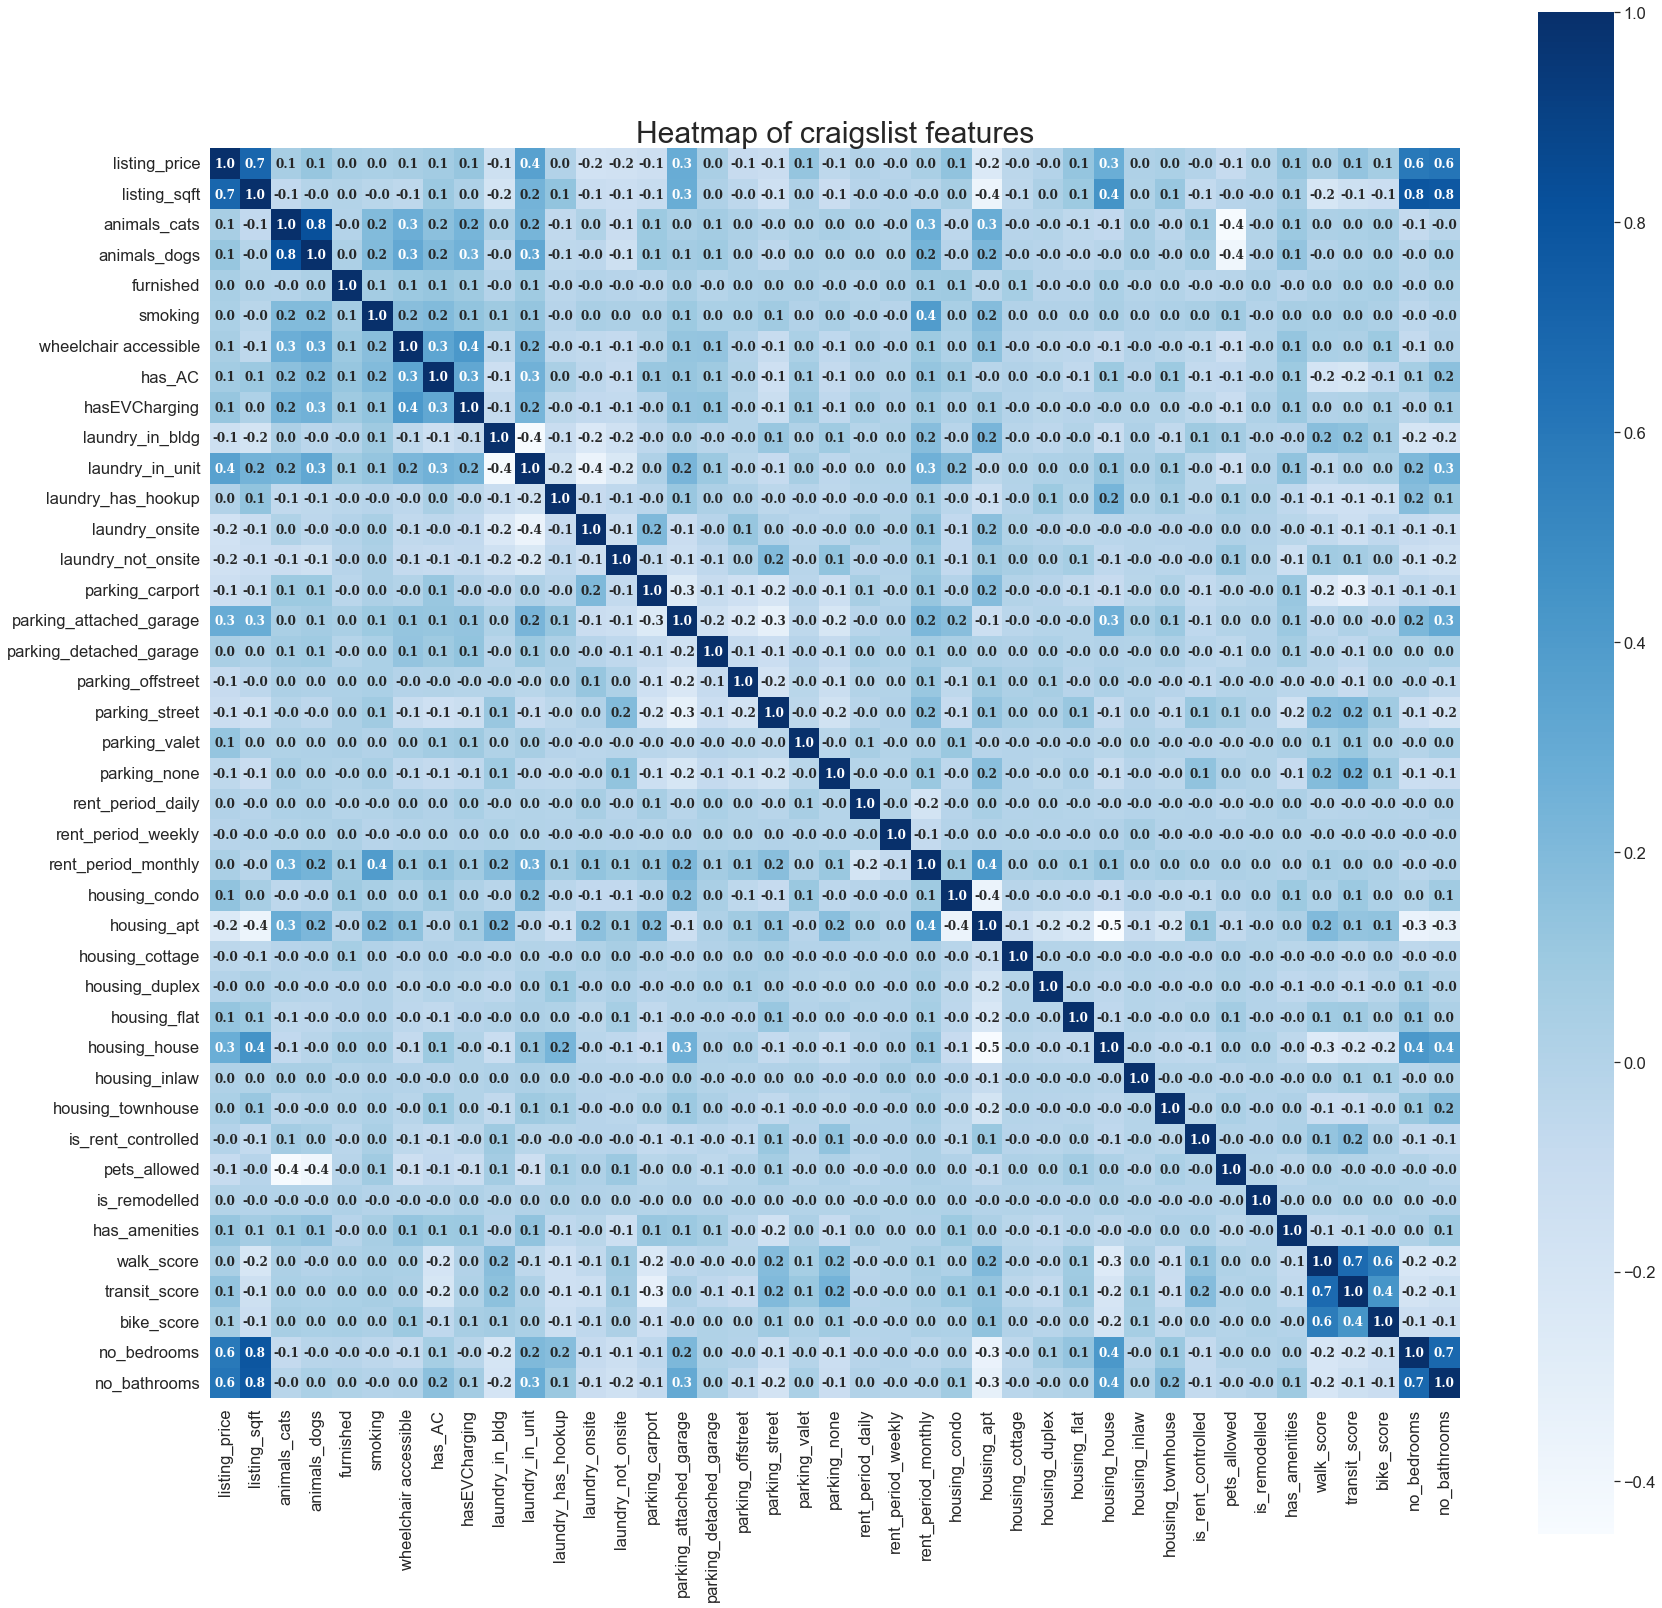

In [46]:
#Make a heatmap of the data 
plt.figure(figsize=(28, 28))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), cmap='Blues',
            annot=True,
            fmt=".1f",
            annot_kws={
                'fontsize': 12,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            },square=True)
plt.title('Heatmap of craigslist features', fontsize = 30) 


Numeric features that seem most correlated with price are:
* Listing_sqft
* Number of bedrooms
* Number of bathrooms
* Laundry in unit
* Parking in an attached garage
* A house, apartment or condo
* Allows cats or dogs
* Valet parking
* Has EV charging

Other features that are noteworthy: 
* Walk score, transit score and bike score are highly correlated
* Number of bedrooms and bathrooms is correlated to square footage
* Allowing cats and dogs
* Rental type house and listing sqft

Text(0.5, 1.0, 'Number of bathrooms vs. Price')

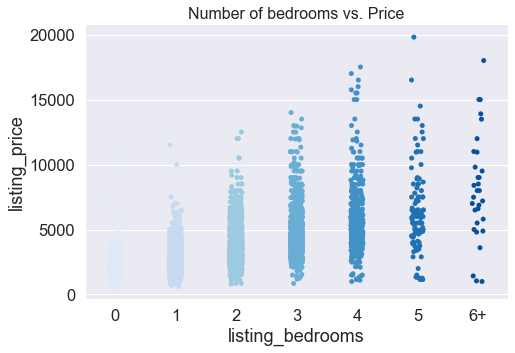

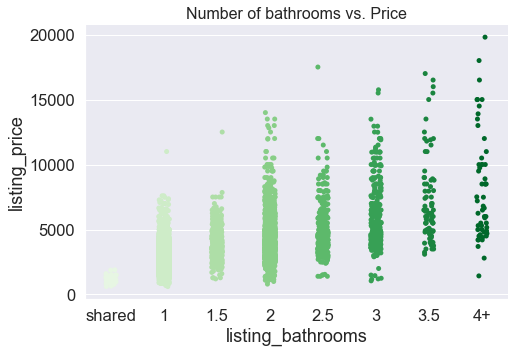

In [47]:
# Plot bedrooms/bathrooms against price
sns.catplot(x='listing_bedrooms', y="listing_price", data=df, order=['0','1','2','3','4','5','6+'], palette="Blues", height=5, aspect=1.5)
plt.title("Number of bedrooms vs. Price", fontsize=16)
sns.catplot(x='listing_bathrooms', y="listing_price", data=df, order=['shared','1','1.5','2','2.5','3','3.5','4+'], palette="Greens", height=5, aspect=1.5)
plt.title("Number of bathrooms vs. Price", fontsize=16)

The plots make sense, as we would expect price to increase with the number of bedrooms/bathrooms. Shared bathroom rentals i.e. SROs seems to be an obvious low price category with few outliers.

(100.0, 20000.0)

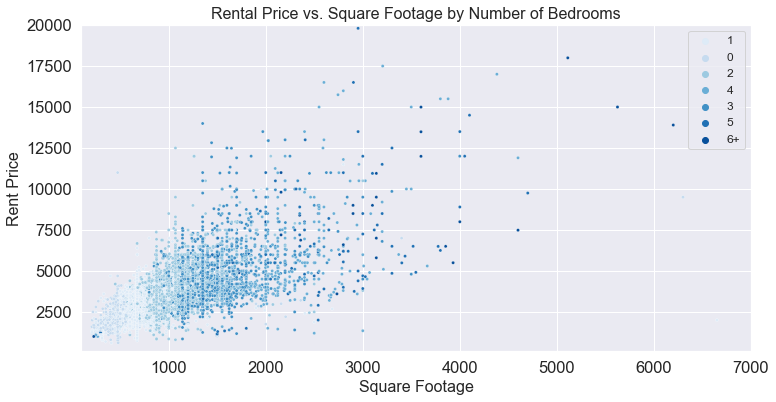

In [48]:
# Plot scatterplot showing distribution of price and sqft
plt.figure(figsize=(12, 6))
sns.scatterplot(y='listing_price', x='listing_sqft', hue='listing_bedrooms', palette='Blues', data=df, s=10)
plt.legend(fontsize=12)
plt.xlabel("Square Footage", fontsize=16)
plt.ylabel("Rent Price", fontsize=16);
plt.title("Rental Price vs. Square Footage by Number of Bedrooms", fontsize=16)
plt.xlim([100, 7000])
plt.ylim([100, 20000])
# x_jitter=True, y_jitter=True, s=125,

## Baseline price prediction

A very basic baseline for price prediction would be the mean price for the number of bedrooms and bathrooms a listing has.
This kind of statistic is often quoted in news articles about rental prices. 
Group by bedroom,bathroom and plot the price distribution

In [49]:
# Find the mean listing_price for number of bedrooms and bathrooms
mean_price_bedroom = df.groupby(['listing_bedrooms','listing_bathrooms']).mean()['listing_price'].reset_index()
mean_price_bedroom

,listing_bedrooms,listing_bathrooms,listing_price
0,0,1,2152.399029
1,0,1.5,3650.000000
2,0,2,5093.400000
3,0,3,9500.000000
4,0,shared,1016.611111
5,1,1,2583.576713
6,1,1.5,3490.282353
7,1,2,4074.897959
8,1,2.5,5216.666667
9,1,shared,1204.666667


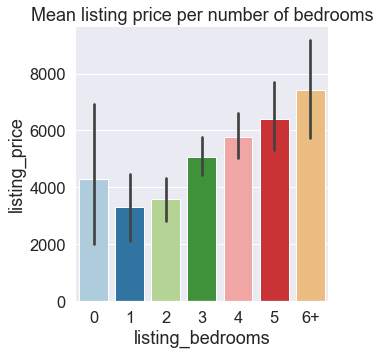

In [50]:
sns.catplot(data=mean_price_bedroom, x="listing_bedrooms", y="listing_price", kind='bar',dodge=False, order=['0','1','2','3','4','5','6+'], palette=sns.color_palette('Paired')).set(title="Mean listing price per number of bedrooms")

There seems to be a much larger variation in price for studios, ranging from 2000 to 7000. The confidence interval is wider, probably because there are outliers dragging up the mean. It also doesn't make sense that studios would be more expensive than one bedroom listings. Try plotting the distribution of 0 bedroom listings against bathrooms:

In [51]:
studio_price = df[df['no_bedrooms'] == 0][['no_bathrooms','listing_price']]
studio_price

,no_bathrooms,listing_price
2,1.0,2125
12,1.0,2800
51,1.0,1595
62,1.0,2690
82,2.0,7000
...,...,...
10240,1.0,2600
10244,1.0,1800
10255,1.0,2320
10312,1.0,1695


Text(0, 0.5, 'Count')

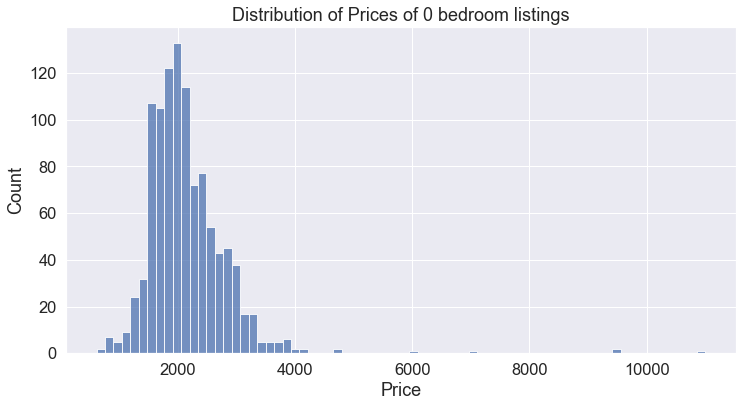

In [52]:
# Look at the distribution of price for 0 bedroom listings
plt.figure(figsize=(12, 6))
g = sns.histplot(data=studio_price['listing_price'], palette=sns.color_palette('Paired'))
plt.title("Distribution of Prices of 0 bedroom listings")
plt.xlabel("Price")
plt.ylabel('Count')

The distribution has a very long tail. I suspect users are defaulting to 0 bedrooms if they forget to change the drop down box in craigslist. Remove the outlier by capping at the 97th percentile

In [53]:
# Cap the top 3% percentile of all listing_price for studios
upper_lim = df[df['no_bedrooms'] == 0]['listing_price'].quantile(q = 0.97)
print(f'The upper price limit is ${upper_lim}')

df.loc[(df['listing_price'] > upper_lim) & (df['no_bedrooms'] == 0),'listing_price'] = upper_lim

The upper price limit is $3388.6199999999994


Text(0, 0.5, 'Count')

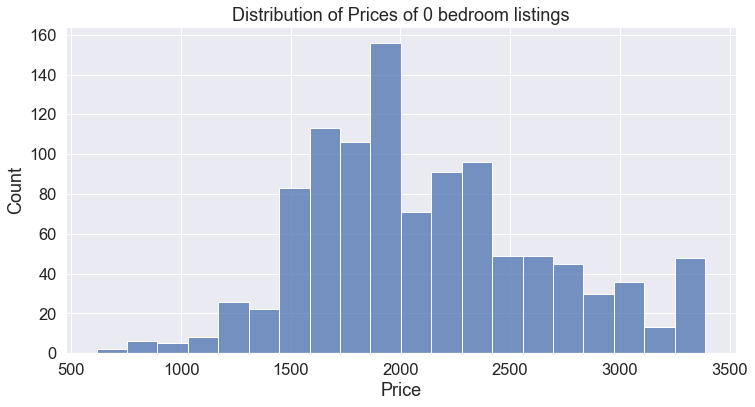

In [54]:
studio_price = df[df['no_bedrooms'] == 0][['listing_price','no_bathrooms']]
# Plot the distribution
plt.figure(figsize=(12, 6))
g = sns.histplot(data=studio_price['listing_price'], palette=sns.color_palette('Paired'))
plt.title("Distribution of Prices of 0 bedroom listings")
plt.xlabel("Price")
plt.ylabel('Count')

This looks like a much better distribution with no long tail

In [55]:
# Find the mean listing_price for number of bedrooms and bathrooms
mean_price_bedroom = df.groupby(['listing_bedrooms','listing_bathrooms']).mean()['listing_price'].reset_index()
mean_price_bedroom

,listing_bedrooms,listing_bathrooms,listing_price
0,0,1,2132.245010
1,0,1.5,3388.620000
2,0,2,3148.848000
3,0,3,3388.620000
4,0,shared,1016.611111
5,1,1,2583.576713
6,1,1.5,3490.282353
7,1,2,4074.897959
8,1,2.5,5216.666667
9,1,shared,1204.666667


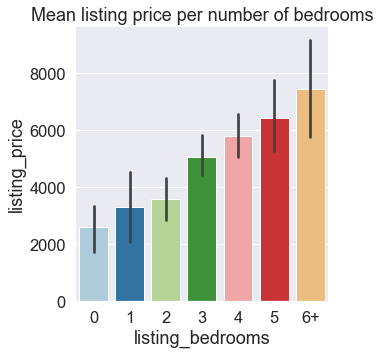

In [56]:
sns.catplot(data=mean_price_bedroom, x="listing_bedrooms", y="listing_price", kind='bar',dodge=False, order=['0','1','2','3','4','5','6+'], palette=sns.color_palette('Paired')).set(title="Mean listing price per number of bedrooms")

The confidence interval for studio listings look similar to the confidence interval for other number of bedrooms and the mean listing price increases with bedroom as we would expect. 

In [57]:
# Drop unused categorical features
cat_features = ['listing_title','listing_date','listing_bedrooms','listing_bathrooms','listing_info','listing_body','listing_url','listing_first_image','listing_info_split']
df.drop(cat_features,axis=1,inplace=True)

In [58]:
df.shape

(10319, 43)

In [59]:
print(f'There are {len(df.listing_city.value_counts())} cities and {len(df.listing_nh.value_counts())} neighborhoods in this dataset')

There are 31 cities and 82 neighborhoods in this dataset


The remaining categorical features neighborhood and city will be imputed with mean price data in the preprocessing notebook. 

## 4. PCA on features

In [60]:
#Create a new dataframe with numeric columns only
df_numeric_scale = df.drop(['listing_nh','listing_city','listing_price'],axis=1)
#Save the index
df_numeric_scale_index = df_numeric_scale.index
#Save the column names
df_numeric_scale_columns = df_numeric_scale.columns

# Scale the features
df_numeric_scale = scale(df_numeric_scale)

# Convert back to a dataframe
df_numeric_scale_df = pd.DataFrame(df_numeric_scale, columns = df_numeric_scale_columns)
df_numeric_scale_df.head()

,listing_sqft,animals_cats,animals_dogs,furnished,smoking,wheelchair accessible,has_AC,hasEVCharging,laundry_in_bldg,laundry_in_unit,...,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score,no_bedrooms,no_bathrooms
0,-1.151221,-0.869555,-0.766829,-0.246922,-1.200024,-0.309114,-0.387306,-0.276727,-0.536603,1.233093,...,-0.13696,-0.191762,1.919392,-0.031145,0.670752,0.201141,-0.797294,1.301062,-0.698316,-0.640908
1,-0.098185,-0.869555,-0.766829,-0.246922,-1.200024,-0.309114,-0.387306,-0.276727,-0.536603,-0.810969,...,-0.13696,-0.191762,1.919392,-0.031145,0.670752,0.743969,0.811375,1.301062,-0.698316,-0.640908
2,-0.941413,1.150013,1.304071,-0.246922,0.833317,-0.309114,-0.387306,-0.276727,-0.536603,1.233093,...,-0.13696,-0.191762,-0.520998,-0.031145,0.670752,0.382083,0.333122,0.834918,-1.607351,-0.640908
3,-0.202090,-0.869555,-0.766829,-0.246922,-1.200024,-0.309114,-0.387306,-0.276727,1.863574,-0.810969,...,-0.13696,-0.191762,1.919392,-0.031145,0.670752,0.110669,-0.319041,-1.236835,0.210719,-0.640908
4,-0.202090,-0.869555,-0.766829,-0.246922,0.833317,-0.309114,-0.387306,-0.276727,1.863574,-0.810969,...,-0.13696,-0.191762,-0.520998,-0.031145,0.670752,0.608262,0.767898,-0.926072,0.210719,-0.640908


In [61]:
df_pca = PCA().fit(df_numeric_scale)

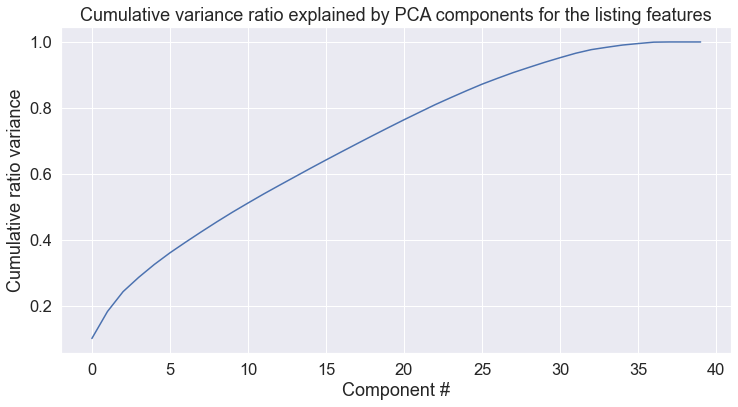

In [62]:
# Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of df_pca
# Create a line plot to visualize the cumulative explained variance ratio with number of components

plt.subplots(figsize=(12, 6))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for the listing features');

As expected, the cumulative ratio variance is not heavily influenced by a few key features. The first 10 components explain about 50% of the cumulative variance. The plot looks uniform across all 40 features.

In [63]:
df.to_csv(r'/Users/pandabear/springboard/CapstoneTwoProject/data/interim/listing_df_EDA.csv', header=True)
print('Saved to csv file')

Saved to csv file
